/Users/drt/src/anaconda37/anaconda3/lib/python3.7/site-packages/spectral/io/envi.py:195: UserWarning: Parameters with non-lowercase names encountered and converted to lowercase. To retain source file parameter name capitalization, set spectral.setttings.envi_support_nonlowercase_params to True.
  warnings.warn(msg)
/Users/drt/src/anaconda37/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:24: DeprecationWarning: tostring() is deprecated. Use tobytes() instead.
/Users/drt/src/anaconda37/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:25: DeprecationWarning: tostring() is deprecated. Use tobytes() instead.
/Users/drt/src/anaconda37/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:26: DeprecationWarning: tostring() is deprecated. Use tobytes() instead.
/Users/drt/src/anaconda37/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:27: DeprecationWarning: tostring() is deprecated. Use tobytes() instead.
/Users/drt/src/anaconda37/anaconda3/lib/python3

Header parameter names converted to lower case.
Header parameter names converted to lower case.
Header parameter names converted to lower case.
Header parameter names converted to lower case.
Header parameter names converted to lower case.


/Users/drt/src/anaconda37/anaconda3/lib/python3.7/site-packages/spectral/io/envi.py:195: UserWarning: Parameters with non-lowercase names encountered and converted to lowercase. To retain source file parameter name capitalization, set spectral.setttings.envi_support_nonlowercase_params to True.
  warnings.warn(msg)
/Users/drt/src/anaconda37/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:36: DeprecationWarning: tostring() is deprecated. Use tobytes() instead.


Header parameter names converted to lower case.


/Users/drt/src/anaconda37/anaconda3/lib/python3.7/site-packages/spectral/io/envi.py:195: UserWarning: Parameters with non-lowercase names encountered and converted to lowercase. To retain source file parameter name capitalization, set spectral.setttings.envi_support_nonlowercase_params to True.
  warnings.warn(msg)
/Users/drt/src/anaconda37/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:38: DeprecationWarning: tostring() is deprecated. Use tobytes() instead.


Header parameter names converted to lower case.
Header parameter names converted to lower case.


/Users/drt/src/anaconda37/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:42: DeprecationWarning: tostring() is deprecated. Use tobytes() instead.


Header parameter names converted to lower case.


/Users/drt/src/anaconda37/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:44: DeprecationWarning: tostring() is deprecated. Use tobytes() instead.


Saving /Users/drt/src/hvm3/l1/data/HVM3_FlatField_44ms_20221122
Saving /Users/drt/src/hvm3/l1/data/HVM3_FlatField_44ms_narrow_20221122


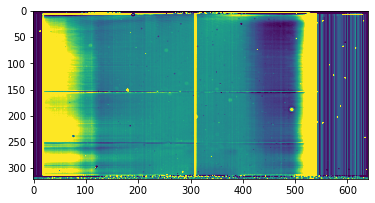

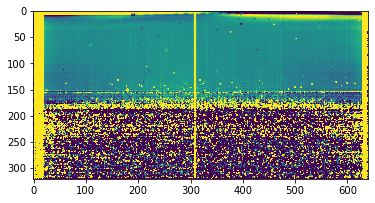

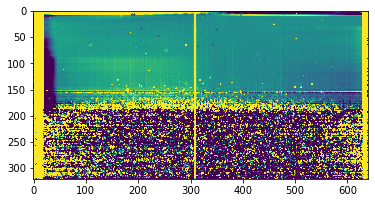

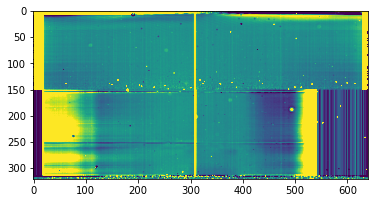

In [1]:
#### David R Thompson
import numpy as np
import pylab as plt
from scipy.interpolate import interp1d
from spectral.io import envi
from numba import jit

@jit
def replace(I,lo=0.1,hi=10,maxrow=9999):
    bad = np.zeros_like(I)
    for r in range(1,I.shape[0]-1):
        for c in range(1,I.shape[1]-1):
            if I[r,c]< lo or I[r,c]>hi:
                bad[r,c] = 1
    new = I.copy()
    for r in range(1,I.shape[0]-1):
        for c in range(1,I.shape[1]-1):
            if bad[r,c]:
                column_ok = np.where(np.logical_not(bad[:,c]))[0]
                column_ok = column_ok[column_ok<maxrow]
                new[r,c] = np.median(I[column_ok,c])
    return new

flat_44ms_swir_a = envi.open('/Users/drt/data/22HVM3/swircal/RFF_22Cal4_10_flat.hdr').load()
flat_44ms_swir_b = envi.open('/Users/drt/data/22HVM3/swircal/RFF_22Cal5_10_flat.hdr').load()
flat_44ms_swir_c = envi.open('/Users/drt/data/22HVM3/swircal/RFF_22Cal6_10_flat.hdr').load()
flat_44ms_swir_d = envi.open('/Users/drt/data/22HVM3/swircal/RFF_22Cal7_10_flat.hdr').load()
flat_227ms_swir = envi.open('/Users/drt/data/22HVM3/swircal/RFF_4p4Cal4_10_flat.hdr').load()
flat_44ms_swir_a = np.squeeze(replace(flat_44ms_swir_a[:,:,0]))
flat_44ms_swir_b = np.squeeze(replace(flat_44ms_swir_b[:,:,0]))
flat_44ms_swir_c = np.squeeze(replace(flat_44ms_swir_c[:,:,0]))
flat_44ms_swir_d = np.squeeze(replace(flat_44ms_swir_d[:,:,0]))
flat_44ms_swir = np.median([flat_44ms_swir_a, flat_44ms_swir_b, flat_44ms_swir_c, flat_44ms_swir_d],axis=0)


flat_44ms_mwir_rl = envi.open('/Users/drt/data/22HVM3/mwircal/20221109_063056_UTC_LNTY_Spec180_FPA120_BB350_44ms_RL_flat.hdr').load()
flat_44ms_mwir_rl = np.squeeze(replace(flat_44ms_mwir_rl[:,:,0],maxrow=150))
flat_44ms_mwir_lr = envi.open('/Users/drt/data/22HVM3/mwircal/20221109_055939_UTC_LNTY_Spec180_FPA120_BB350_44ms_LR_flat.hdr').load()
flat_44ms_mwir_lr = np.squeeze(replace(flat_44ms_mwir_lr[:,:,0],maxrow=150))
flat_44ms_mwir_a = np.concatenate((flat_44ms_mwir_lr[:,:360],flat_44ms_mwir_rl[:,360:]),axis=1)

flat_44ms_mwir_rl = envi.open('/Users/drt/data/22HVM3/mwircal/20221111_091347_UTC_LNTY_Spec180_FPA120_BB375_44ms_RL_flat.hdr').load()
flat_44ms_mwir_rl = np.squeeze(replace(flat_44ms_mwir_rl[:,:,0],maxrow=150))
flat_44ms_mwir_lr = envi.open('/Users/drt/data/22HVM3/mwircal/20221111_083304_UTC_LNTY_Spec180_FPA120_BB375_44ms_LR_flat.hdr').load()
flat_44ms_mwir_lr = np.squeeze(replace(flat_44ms_mwir_lr[:,:,0],maxrow=150))
flat_44ms_mwir_b = np.concatenate((flat_44ms_mwir_lr[:,:370],flat_44ms_mwir_rl[:,370:]),axis=1)

plt.imshow(flat_44ms_swir,vmin=0.9,vmax=1.1)
plt.figure()
plt.imshow(flat_44ms_mwir_a,vmin=0.9,vmax=1.1)
plt.figure()
plt.imshow(flat_44ms_mwir_b,vmin=0.9,vmax=1.1)

flat_44ms = flat_44ms_swir.copy()
flat_44ms[:150,:] = flat_44ms_mwir_a[:150,:]
plt.figure()
plt.imshow(flat_44ms,vmin=0.9,vmax=1.1)
envi.save_image('../data/HVM3_FlatField_44ms_20221122.hdr',
               np.array(flat_44ms, dtype=np.float32), ext='', force=True)

envi.save_image('../data/HVM3_FlatField_44ms_narrow_20221122.hdr',
               np.array(flat_44ms[:,160:480], dtype=np.float32), ext='', force=True)

Header parameter names converted to lower case.
Header parameter names converted to lower case.
Header parameter names converted to lower case.
Header parameter names converted to lower case.


/Users/drt/src/anaconda37/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:24: DeprecationWarning: tostring() is deprecated. Use tobytes() instead.
/Users/drt/src/anaconda37/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:25: DeprecationWarning: tostring() is deprecated. Use tobytes() instead.
/Users/drt/src/anaconda37/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:26: DeprecationWarning: tostring() is deprecated. Use tobytes() instead.
/Users/drt/src/anaconda37/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:27: DeprecationWarning: tostring() is deprecated. Use tobytes() instead.
/Users/drt/src/anaconda37/anaconda3/lib/python3.7/site-packages/spectral/io/envi.py:195: UserWarning: Parameters with non-lowercase names encountered and converted to lowercase. To retain source file parameter name capitalization, set spectral.setttings.envi_support_nonlowercase_params to True.
  warnings.warn(msg)
/Users/drt/src/anaconda37/anaconda3/lib/python3

Header parameter names converted to lower case.


/Users/drt/src/anaconda37/anaconda3/lib/python3.7/site-packages/spectral/io/envi.py:195: UserWarning: Parameters with non-lowercase names encountered and converted to lowercase. To retain source file parameter name capitalization, set spectral.setttings.envi_support_nonlowercase_params to True.
  warnings.warn(msg)
/Users/drt/src/anaconda37/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:37: DeprecationWarning: tostring() is deprecated. Use tobytes() instead.


Header parameter names converted to lower case.
Header parameter names converted to lower case.


/Users/drt/src/anaconda37/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:41: DeprecationWarning: tostring() is deprecated. Use tobytes() instead.


Header parameter names converted to lower case.


/Users/drt/src/anaconda37/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:43: DeprecationWarning: tostring() is deprecated. Use tobytes() instead.


Header parameter names converted to lower case.


/Users/drt/src/anaconda37/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:47: DeprecationWarning: tostring() is deprecated. Use tobytes() instead.


Header parameter names converted to lower case.


/Users/drt/src/anaconda37/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:49: DeprecationWarning: tostring() is deprecated. Use tobytes() instead.


Header parameter names converted to lower case.


/Users/drt/src/anaconda37/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:53: DeprecationWarning: tostring() is deprecated. Use tobytes() instead.


Header parameter names converted to lower case.


/Users/drt/src/anaconda37/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:55: DeprecationWarning: tostring() is deprecated. Use tobytes() instead.


Header parameter names converted to lower case.


/Users/drt/src/anaconda37/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:59: DeprecationWarning: tostring() is deprecated. Use tobytes() instead.


Header parameter names converted to lower case.


/Users/drt/src/anaconda37/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:61: DeprecationWarning: tostring() is deprecated. Use tobytes() instead.


Saving /Users/drt/src/hvm3/l1/data/HVM3_FlatField_227ms_20221122
Saving /Users/drt/src/hvm3/l1/data/HVM3_FlatField_227ms_narrow_20221122


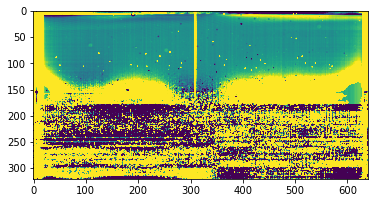

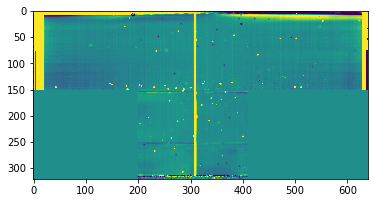

In [2]:
#### David R Thompson
import numpy as np
import pylab as plt
from scipy.interpolate import interp1d
from spectral.io import envi
from numba import jit

@jit
def replace(I,lo=0.1,hi=10,maxrow=9999):
    bad = np.zeros_like(I)
    for r in range(1,I.shape[0]-1):
        for c in range(1,I.shape[1]-1):
            if I[r,c]< lo or I[r,c]>hi:
                bad[r,c] = 1
    new = I.copy()
    for r in range(1,I.shape[0]-1):
        for c in range(1,I.shape[1]-1):
            if bad[r,c]:
                column_ok = np.where(np.logical_not(bad[:,c]))[0]
                column_ok = column_ok[column_ok<maxrow]
                new[r,c] = np.median(I[column_ok,c])
    return new

flat_227ms_swir_a = envi.open('/Users/drt/data/22HVM3/swircal/RFF_4p4Cal4_10_flat.hdr').load()
flat_227ms_swir_b = envi.open('/Users/drt/data/22HVM3/swircal/RFF_4p4Cal5_10_flat.hdr').load()
flat_227ms_swir_c = envi.open('/Users/drt/data/22HVM3/swircal/RFF_4p4Cal6_10_flat.hdr').load()
flat_227ms_swir_d = envi.open('/Users/drt/data/22HVM3/swircal/RFF_4p4Cal7_10_flat.hdr').load()
flat_227ms_swir_a = np.squeeze(replace(flat_227ms_swir_a[:,:,0]))
flat_227ms_swir_b = np.squeeze(replace(flat_227ms_swir_b[:,:,0]))
flat_227ms_swir_c = np.squeeze(replace(flat_227ms_swir_c[:,:,0]))
flat_227ms_swir_d = np.squeeze(replace(flat_227ms_swir_d[:,:,0]))
flat_227ms_swir = np.median([flat_227ms_swir_b, flat_227ms_swir_c, flat_227ms_swir_d],axis=0)


flat_227ms_mwir_rl = envi.open('/Users/drt/data/22HVM3/mwircal/20221108_151433_UTC_LNTY_Spec180_FPA_120_BB300_227ms_RL_flat.hdr').load()
flat_227ms_mwir_rl = np.squeeze(replace(flat_227ms_mwir_rl[:,:,0],maxrow=150))
flat_227ms_mwir_lr = envi.open('/Users/drt/data/22HVM3/mwircal/20221108_143052_UTC_LNTY_Spec180_FPA_120_BB300_227ms_LR_flat.hdr').load()
flat_227ms_mwir_lr = np.squeeze(replace(flat_227ms_mwir_lr[:,:,0],maxrow=150))
flat_227ms_mwir_d = np.concatenate((flat_227ms_mwir_lr[:,:350],flat_227ms_mwir_rl[:,350:]),axis=1)

flat_227ms_mwir_rl = envi.open('/Users/drt/data/22HVM3/mwircal/20221111_034147_UTC_LNTY_Spec180_FPA120_BB325_227ms_RL_flat.hdr').load()
flat_227ms_mwir_rl = np.squeeze(replace(flat_227ms_mwir_rl[:,:,0],maxrow=150))
flat_227ms_mwir_lr = envi.open('/Users/drt/data/22HVM3/mwircal/20221111_030732_UTC_LNTY_Spec180_FPA120_BB325_227ms_LR_flat.hdr').load()
flat_227ms_mwir_lr = np.squeeze(replace(flat_227ms_mwir_lr[:,:,0],maxrow=150))
flat_227ms_mwir_a = np.concatenate((flat_227ms_mwir_lr[:,:350],flat_227ms_mwir_rl[:,350:]),axis=1)

flat_227ms_mwir_rl = envi.open('/Users/drt/data/22HVM3/mwircal/20221109_102537_UTC_LNTY_Spec180_FPA120_BB350_227ms_RL_flat.hdr').load()
flat_227ms_mwir_rl = np.squeeze(replace(flat_227ms_mwir_rl[:,:,0],maxrow=150))
flat_227ms_mwir_lr = envi.open('/Users/drt/data/22HVM3/mwircal/20221109_095521_UTC_LNTY_Spec180_FPA120_BB350_227ms_LR_flat.hdr').load()
flat_227ms_mwir_lr = np.squeeze(replace(flat_227ms_mwir_lr[:,:,0],maxrow=150))
flat_227ms_mwir_b = np.concatenate((flat_227ms_mwir_lr[:,:370],flat_227ms_mwir_rl[:,370:]),axis=1)

flat_227ms_mwir_rl = envi.open('/Users/drt/data/22HVM3/mwircal/20221111_133905_UTC_LNTY_Spec180_FPA120_BB375_227ms_RL_flat.hdr').load()
flat_227ms_mwir_rl = np.squeeze(replace(flat_227ms_mwir_rl[:,:,0],maxrow=150))
flat_227ms_mwir_lr = envi.open('/Users/drt/data/22HVM3/mwircal/20221111_130637_UTC_LNTY_Spec180_FPA120_BB375_227ms_LR_flat.hdr').load()
flat_227ms_mwir_lr = np.squeeze(replace(flat_227ms_mwir_lr[:,:,0],maxrow=150))
flat_227ms_mwir_c = np.concatenate((flat_227ms_mwir_lr[:,:370],flat_227ms_mwir_rl[:,370:]),axis=1)

flat_227ms_mwir_rl = envi.open('/Users/drt/data/22HVM3/mwircal/20221120_045444_UTC_Dried_MWIR_Spec179_FPA120_BB290_227ms_RL_flat.hdr').load()
flat_227ms_mwir_rl = np.squeeze(replace(flat_227ms_mwir_rl[:,:,0],maxrow=150))
flat_227ms_mwir_lr = envi.open('/Users/drt/data/22HVM3/mwircal/20221120_042457_UTC_Dried_MWIR_Spec179_FPA120_BB290_227ms_LR_flat.hdr').load()
flat_227ms_mwir_lr = np.squeeze(replace(flat_227ms_mwir_lr[:,:,0],maxrow=150))
flat_227ms_mwir_e = np.concatenate((flat_227ms_mwir_lr[:,:350],flat_227ms_mwir_rl[:,350:]),axis=1)


plt.figure()
plt.imshow(flat_227ms_mwir_e,vmin=0.9,vmax=1.1)
flat_227ms = flat_227ms_swir.copy()
flat_227ms[:150,:] = flat_227ms_mwir_d[:150,:]
flat_227ms[75:150,:] = flat_227ms_mwir_b[75:150,:]
flat_227ms[150:,:200] = 1
flat_227ms[150:,410:] = 1
#flat_227ms[120:150,:350] = flat_227ms_swir[120:150,:350]
plt.figure()
plt.imshow(flat_227ms,vmin=0.9,vmax=1.1)
envi.save_image('../data/HVM3_FlatField_227ms_20221122.hdr',
               np.array(flat_227ms, dtype=np.float32), ext='', force=True)

envi.save_image('../data/HVM3_FlatField_227ms_narrow_20221122.hdr',
               np.array(flat_227ms[:,160:480], dtype=np.float32), ext='', force=True)

Header parameter names converted to lower case.
Header parameter names converted to lower case.
Header parameter names converted to lower case.
Header parameter names converted to lower case.


/Users/drt/src/anaconda37/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:1: DeprecationWarning: tostring() is deprecated. Use tobytes() instead.
  """Entry point for launching an IPython kernel.
/Users/drt/src/anaconda37/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:2: DeprecationWarning: tostring() is deprecated. Use tobytes() instead.
  
/Users/drt/src/anaconda37/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:3: DeprecationWarning: tostring() is deprecated. Use tobytes() instead.
  This is separate from the ipykernel package so we can avoid doing imports until
/Users/drt/src/anaconda37/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:4: DeprecationWarning: tostring() is deprecated. Use tobytes() instead.
  after removing the cwd from sys.path.


Header parameter names converted to lower case.


/Users/drt/src/anaconda37/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:12: DeprecationWarning: tostring() is deprecated. Use tobytes() instead.
  if sys.path[0] == '':


Header parameter names converted to lower case.


/Users/drt/src/anaconda37/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:14: DeprecationWarning: tostring() is deprecated. Use tobytes() instead.
  


Header parameter names converted to lower case.


/Users/drt/src/anaconda37/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:18: DeprecationWarning: tostring() is deprecated. Use tobytes() instead.


Header parameter names converted to lower case.


/Users/drt/src/anaconda37/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:20: DeprecationWarning: tostring() is deprecated. Use tobytes() instead.


Header parameter names converted to lower case.


/Users/drt/src/anaconda37/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:24: DeprecationWarning: tostring() is deprecated. Use tobytes() instead.


Header parameter names converted to lower case.


/Users/drt/src/anaconda37/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:26: DeprecationWarning: tostring() is deprecated. Use tobytes() instead.


Saving /Users/drt/src/hvm3/l1/data/HVM3_FlatField_44ms_20221122


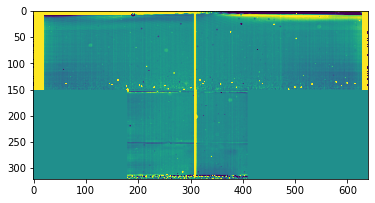

In [3]:

flat_44ms_swir_a = envi.open('/Users/drt/data/22HVM3/swircal/RFF_22Cal4_10_flat.hdr').load()
flat_44ms_swir_b = envi.open('/Users/drt/data/22HVM3/swircal/RFF_22Cal5_10_flat.hdr').load()
flat_44ms_swir_c = envi.open('/Users/drt/data/22HVM3/swircal/RFF_22Cal6_10_flat.hdr').load()
flat_44ms_swir_d = envi.open('/Users/drt/data/22HVM3/swircal/RFF_22Cal7_10_flat.hdr').load()
flat_44ms_swir_a = np.squeeze(replace(flat_44ms_swir_a[:,:,0]))
flat_44ms_swir_b = np.squeeze(replace(flat_44ms_swir_b[:,:,0]))
flat_44ms_swir_c = np.squeeze(replace(flat_44ms_swir_c[:,:,0]))
flat_44ms_swir_d = np.squeeze(replace(flat_44ms_swir_d[:,:,0]))
flat_44ms_swir = np.median([flat_44ms_swir_b, flat_44ms_swir_c, flat_44ms_swir_d],axis=0)


flat_44ms_mwir_rl = envi.open('/Users/drt/data/22HVM3/mwircal/20221108_110602_UTC_LNTY_Spec180_FPA_120_BB300_44ms_RL_flat.hdr').load()
flat_44ms_mwir_rl = np.squeeze(replace(flat_44ms_mwir_rl[:,:,0],maxrow=150))
flat_44ms_mwir_lr = envi.open('/Users/drt/data/22HVM3/mwircal/20221108_103450_UTC_LNTY_Spec180_FPA_120_BB300_44ms_LR_flat.hdr').load()
flat_44ms_mwir_lr = np.squeeze(replace(flat_44ms_mwir_lr[:,:,0],maxrow=150))
flat_44ms_mwir_d = np.concatenate((flat_44ms_mwir_lr[:,:350],flat_44ms_mwir_rl[:,350:]),axis=1)

flat_44ms_mwir_rl = envi.open('/Users/drt/data/22HVM3/mwircal/20221111_091347_UTC_LNTY_Spec180_FPA120_BB375_44ms_RL_flat.hdr').load()
flat_44ms_mwir_rl = np.squeeze(replace(flat_44ms_mwir_rl[:,:,0],maxrow=150))
flat_44ms_mwir_lr = envi.open('/Users/drt/data/22HVM3/mwircal/20221111_083304_UTC_LNTY_Spec180_FPA120_BB375_44ms_LR_flat.hdr').load()
flat_44ms_mwir_lr = np.squeeze(replace(flat_44ms_mwir_lr[:,:,0],maxrow=150))
flat_44ms_mwir_a = np.concatenate((flat_44ms_mwir_lr[:,:350],flat_44ms_mwir_rl[:,350:]),axis=1)

flat_44ms_mwir_rl = envi.open('/Users/drt/data/22HVM3/mwircal/20221109_063056_UTC_LNTY_Spec180_FPA120_BB350_44ms_RL_flat.hdr').load()
flat_44ms_mwir_rl = np.squeeze(replace(flat_44ms_mwir_rl[:,:,0],maxrow=150))
flat_44ms_mwir_lr = envi.open('/Users/drt/data/22HVM3/mwircal/20221109_055939_UTC_LNTY_Spec180_FPA120_BB350_44ms_LR_flat.hdr').load()
flat_44ms_mwir_lr = np.squeeze(replace(flat_44ms_mwir_lr[:,:,0],maxrow=150))
flat_44ms_mwir_b = np.concatenate((flat_44ms_mwir_lr[:,:350],flat_44ms_mwir_rl[:,350:]),axis=1)

flat_44ms = flat_44ms_swir.copy()
flat_44ms[:150,:] = flat_44ms_mwir_b[:150,:]
#flat_44ms[75:150,:] = flat_44ms_mwir_b[75:150,:]
flat_44ms[150:,:180] = 1
flat_44ms[150:,410:] = 1
plt.figure()
plt.imshow(flat_44ms,vmin=0.9,vmax=1.1)
envi.save_image('../data/HVM3_FlatField_44ms_20221122.hdr',
               np.array(flat_44ms, dtype=np.float32), ext='', force=True)